In [14]:
import numpy as np
from matplotlib import pyplot as plt
import mylibrary as ml

# Initial Conditions - I

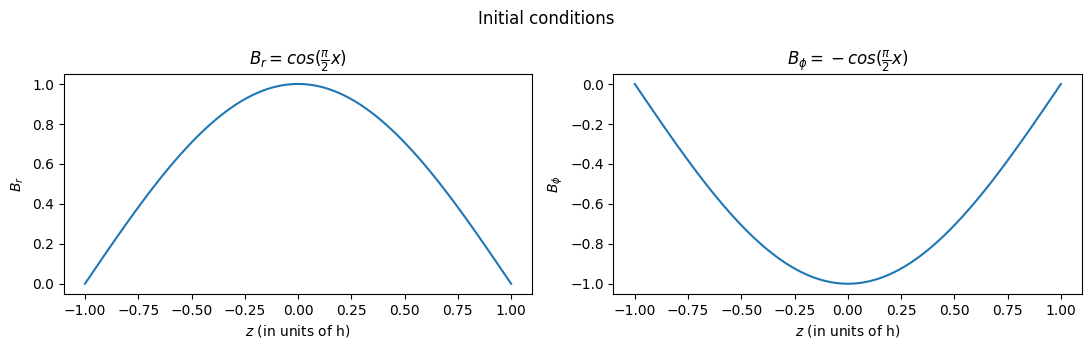

In [15]:
def init_cond_Br(x):
    return np.cos(np.pi/2*x)

def init_cond_Bphi(x):
    return -np.cos(np.pi/2*x)

def source_term(x, t):
    return 0

z = np.linspace(-1, 1, 101)

plt.figure(figsize=(11, 3.5))
plt.subplot(121)
plt.plot(z, init_cond_Br(z))
plt.xlabel(r'$z$ (in units of h)')
plt.ylabel(r'$B_r$')
plt.title(r'$B_r = cos(\frac{\pi}{2}x)$')

plt.subplot(122)
plt.plot(z, init_cond_Bphi(z))
plt.xlabel(r'$z$ (in units of h)')
plt.ylabel(r'$B_{\phi}$')
plt.title(r'$B_\phi = -cos(\frac{\pi}{2}x)$')

plt.suptitle('Initial conditions')
plt.tight_layout(pad=1)

plt.show()

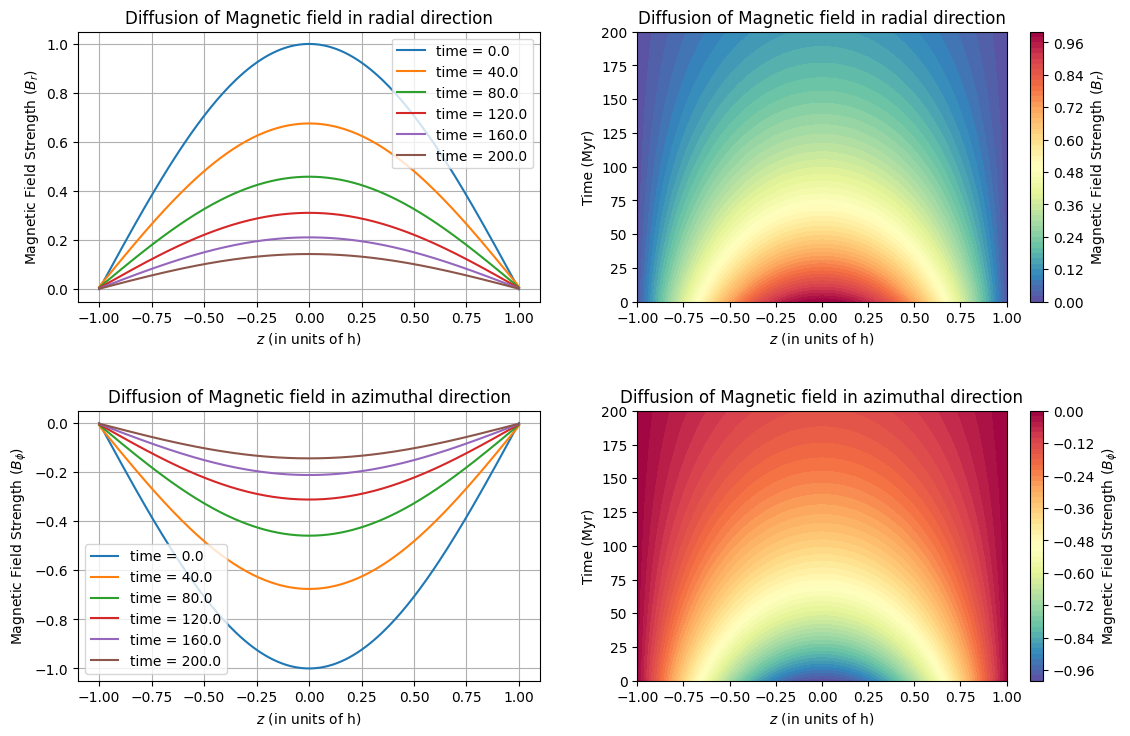

In [16]:
# Constants and parameters
eta_T = 4e-3    # magnetic diffusivity
t_max = 200     # total simulation time
z_min = -1.0     # minimum thickness of the disc
z_max = 1.0     # thickness of the disc
dt = t_max/200       # time step
dz = 0.01       # spatial step in z direction

# Solve for B_r
soln_r, spatial_grid, time_grid = ml.CN_diffusion(z_min, z_max, t_max, dz, dt, eta_T, init_cond_Br, source_term, ml.diff_mat_dirichlet)
# Solve for B_phi
soln_phi, spatial_grid, time_grid = ml.CN_diffusion(z_min, z_max, t_max, dz, dt, eta_T, init_cond_Bphi, source_term, ml.diff_mat_dirichlet)

# Plot the diffusion equation solution
#ml.plot_diff(time_grid, spatial_grid, soln_r, soln_phi)

# Create 2D plots
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
for i in (range(0, len(time_grid), int(len(time_grid)/5))):
    plt.plot(spatial_grid, soln_r[:, i], label=f'time = {time_grid[i]:.1f}')
plt.xlabel(r'$z$ (in units of h)')
plt.ylabel(r'Magnetic Field Strength ($B_r$)')
plt.title('Diffusion of Magnetic field in radial direction')
# plt.ylim(np.min(solution_r), np.max(solution_r))
plt.grid()
plt.legend()

# Create imshow plot
plt.subplot(2, 2, 2)
plt.contourf(*np.meshgrid(spatial_grid, time_grid), soln_r.T, 50, cmap='Spectral_r')
plt.colorbar(label=r'Magnetic Field Strength ($B_r$)')
plt.title(r'Diffusion of Magnetic field in radial direction')
plt.xlabel(r'$z$ (in units of h)')
plt.ylabel(r'Time (Myr)')

# Create 2D plots
plt.subplot(2, 2, 3)
for i in (range(0, len(time_grid), int(len(time_grid)/5))):
    plt.plot(spatial_grid, soln_phi[:, i], label=f'time = {time_grid[i]:.1f}')
plt.xlabel(r'$z$ (in units of h)')
plt.ylabel(r'Magnetic Field Strength ($B_\phi$)')
plt.title(r'Diffusion of Magnetic field in azimuthal direction')
# plt.ylim(np.min(solution_phi), np.max(solution_phi))
plt.grid()
plt.legend()

# Create imshow plot
plt.subplot(2, 2, 4)
plt.contourf(*np.meshgrid(spatial_grid, time_grid), soln_phi.T, 50, cmap='Spectral_r')
plt.colorbar(label=r'Magnetic Field Strength ($B_\phi$)')
plt.title('Diffusion of Magnetic field in azimuthal direction')
plt.xlabel(r'$z$ (in units of h)')
plt.ylabel('Time (Myr)')
plt.tight_layout(pad=3)

plt.show()

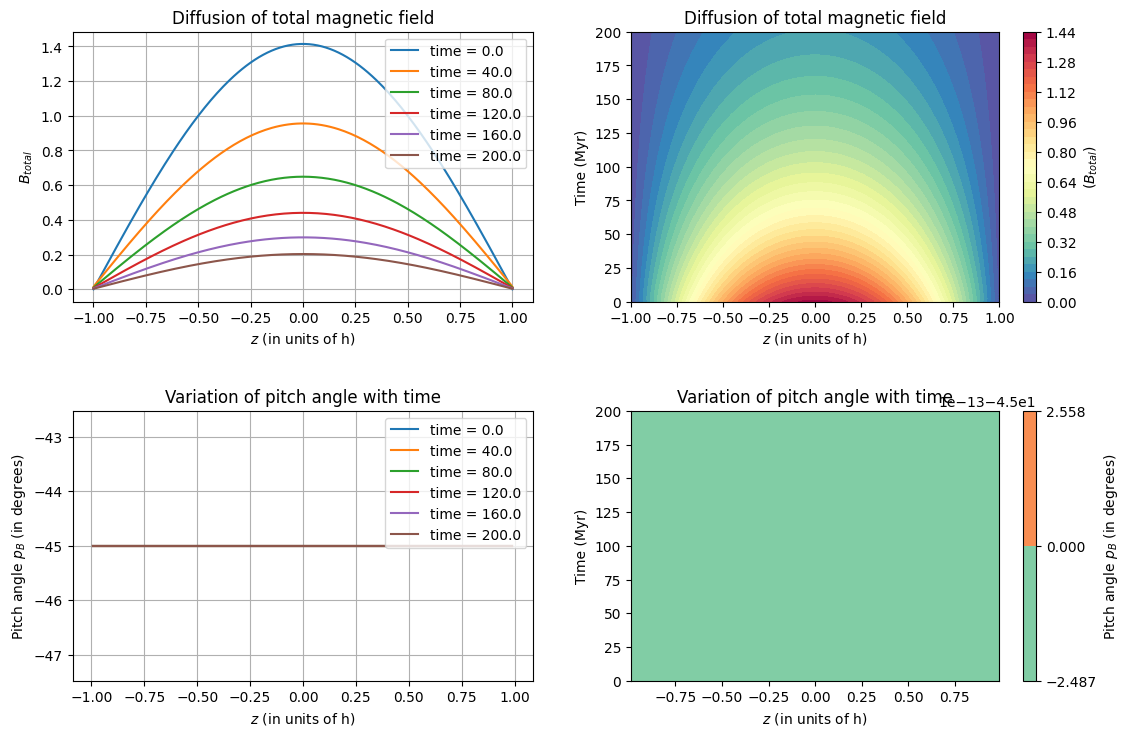

In [17]:
B_total, pitch = ml.get_B_and_pitch(soln_r, soln_phi)

# Plot the total magnetic field and the pitch angle

# Create 2D plots
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
for i in (range(0, len(time_grid), int(len(time_grid)/5))):
    plt.plot(spatial_grid, B_total[:, i], label=f'time = {time_grid[i]:.1f}')
plt.xlabel(r'$z$ (in units of h)')
plt.ylabel(r'$B_{total}$')
plt.title('Diffusion of total magnetic field')
plt.grid()
plt.legend()

# Create imshow plot
plt.subplot(2, 2, 2)
plt.contourf(*np.meshgrid(spatial_grid, time_grid), B_total.T, 40, cmap='Spectral_r')
plt.colorbar(label=r'($B_{total}$)')
plt.title(r'Diffusion of total magnetic field')
plt.xlabel(r'$z$ (in units of h)')
plt.ylabel(r'Time (Myr)')

# Create 2D plots
plt.subplot(2, 2, 3)
for i in (range(0, len(time_grid), int(len(time_grid)/5))):
    plt.plot(spatial_grid[1:-1], pitch[1:-1, i], label=f'time = {time_grid[i]:.1f}')
plt.xlabel(r'$z$ (in units of h)')
plt.ylabel(r'Pitch angle $p_B$ (in degrees)')
plt.title(r'Variation of pitch angle with time')
plt.grid()
plt.legend()

# Create imshow plot
plt.subplot(2, 2, 4)
plt.contourf(*np.meshgrid(spatial_grid[1:-1], time_grid), pitch.T[:, 1:-1], 40, cmap='Spectral_r')
plt.colorbar(label=r'Pitch angle $p_B$ (in degrees)')
plt.title('Variation of pitch angle with time')
plt.xlabel(r'$z$ (in units of h)')
plt.ylabel('Time (Myr)')

plt.tight_layout(pad=3)

plt.show()

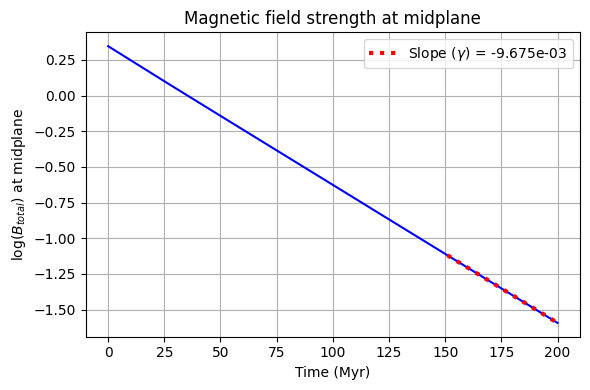

In [18]:
# Plot the decay of the magnetic field at the midplane
B_mid = np.log(B_total[int(len(spatial_grid)/2), :])
m, c = np.polyfit(time_grid[-50:], B_mid[-50:], 1)

plt.figure(figsize=(6, 4))
plt.plot(time_grid, B_mid, 'b-')
# plot another line with the slope and intercept m and c
plt.plot(time_grid[-50:], m*time_grid[-50:] + c, 'r:', linewidth=3, label=r'Slope ($\gamma$) = {:.3e}'.format(m))
plt.xlabel('Time (Myr)')
plt.ylabel('log$(B_{total})$ at midplane')
plt.title(r'Magnetic field strength at midplane')
# plt.yscale('log')
plt.grid()
plt.legend()
plt.tight_layout()

plt.show()

# Initial Conditions - II

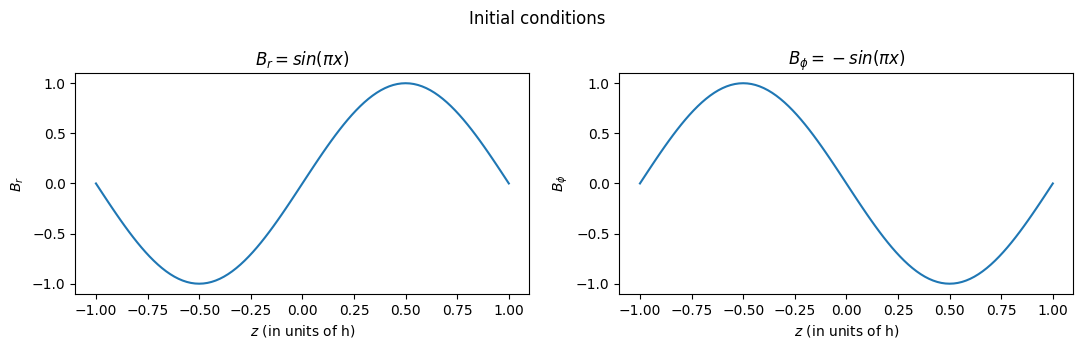

In [19]:
def init_cond_Br(x):
    return np.sin(np.pi*x)

def init_cond_Bphi(x):
    return -np.sin(np.pi*x)

def source_term(x, t):
    return 0

z = np.linspace(-1, 1, 101)

plt.figure(figsize=(11, 3.5))
plt.subplot(121)
plt.plot(z, init_cond_Br(z))
plt.xlabel(r'$z$ (in units of h)')
plt.ylabel(r'$B_r$')
plt.title(r'$B_r = sin(\pi x)$')

plt.subplot(122)
plt.plot(z, init_cond_Bphi(z))
plt.xlabel(r'$z$ (in units of h)')
plt.ylabel(r'$B_{\phi}$')
plt.title(r'$B_\phi = -sin(\pi x)$')

plt.suptitle('Initial conditions')
plt.tight_layout(pad=1)

plt.show()

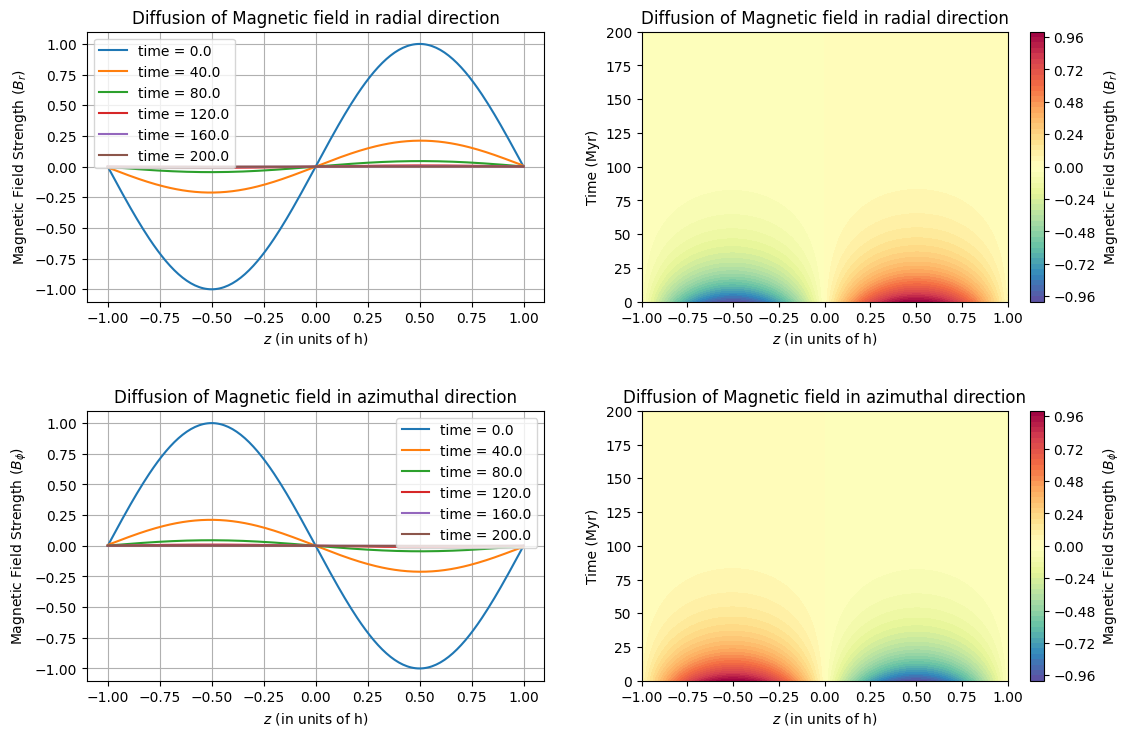

In [20]:
# Constants and parameters
eta_T = 4e-3    # magnetic diffusivity
t_max = 200     # total simulation time
z_min = -1.0     # minimum thickness of the disc
z_max = 1.0     # thickness of the disc
dt = t_max/200       # time step
dz = 0.01       # spatial step in z direction

# Solve for B_r
soln_r, spatial_grid, time_grid = ml.CN_diffusion(z_min, z_max, t_max, dz, dt, eta_T, init_cond_Br, source_term, ml.diff_mat_dirichlet)
# Solve for B_phi
soln_phi, spatial_grid, time_grid = ml.CN_diffusion(z_min, z_max, t_max, dz, dt, eta_T, init_cond_Bphi, source_term, ml.diff_mat_dirichlet)

# Plot the diffusion equation solution
#ml.plot_diff(time_grid, spatial_grid, soln_r, soln_phi)

# Create 2D plots
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
for i in (range(0, len(time_grid), int(len(time_grid)/5))):
    plt.plot(spatial_grid, soln_r[:, i], label=f'time = {time_grid[i]:.1f}')
plt.xlabel(r'$z$ (in units of h)')
plt.ylabel(r'Magnetic Field Strength ($B_r$)')
plt.title('Diffusion of Magnetic field in radial direction')
# plt.ylim(np.min(solution_r), np.max(solution_r))
plt.grid()
plt.legend()

# Create imshow plot
plt.subplot(2, 2, 2)
plt.contourf(*np.meshgrid(spatial_grid, time_grid), soln_r.T, 50, cmap='Spectral_r')
plt.colorbar(label=r'Magnetic Field Strength ($B_r$)')
plt.title(r'Diffusion of Magnetic field in radial direction')
plt.xlabel(r'$z$ (in units of h)')
plt.ylabel(r'Time (Myr)')

# Create 2D plots
plt.subplot(2, 2, 3)
for i in (range(0, len(time_grid), int(len(time_grid)/5))):
    plt.plot(spatial_grid, soln_phi[:, i], label=f'time = {time_grid[i]:.1f}')
plt.xlabel(r'$z$ (in units of h)')
plt.ylabel(r'Magnetic Field Strength ($B_\phi$)')
plt.title(r'Diffusion of Magnetic field in azimuthal direction')
# plt.ylim(np.min(solution_phi), np.max(solution_phi))
plt.grid()
plt.legend()

# Create imshow plot
plt.subplot(2, 2, 4)
plt.contourf(*np.meshgrid(spatial_grid, time_grid), soln_phi.T, 50, cmap='Spectral_r')
plt.colorbar(label=r'Magnetic Field Strength ($B_\phi$)')
plt.title('Diffusion of Magnetic field in azimuthal direction')
plt.xlabel(r'$z$ (in units of h)')
plt.ylabel('Time (Myr)')
plt.tight_layout(pad=3)

plt.show()

# print(time_grid)

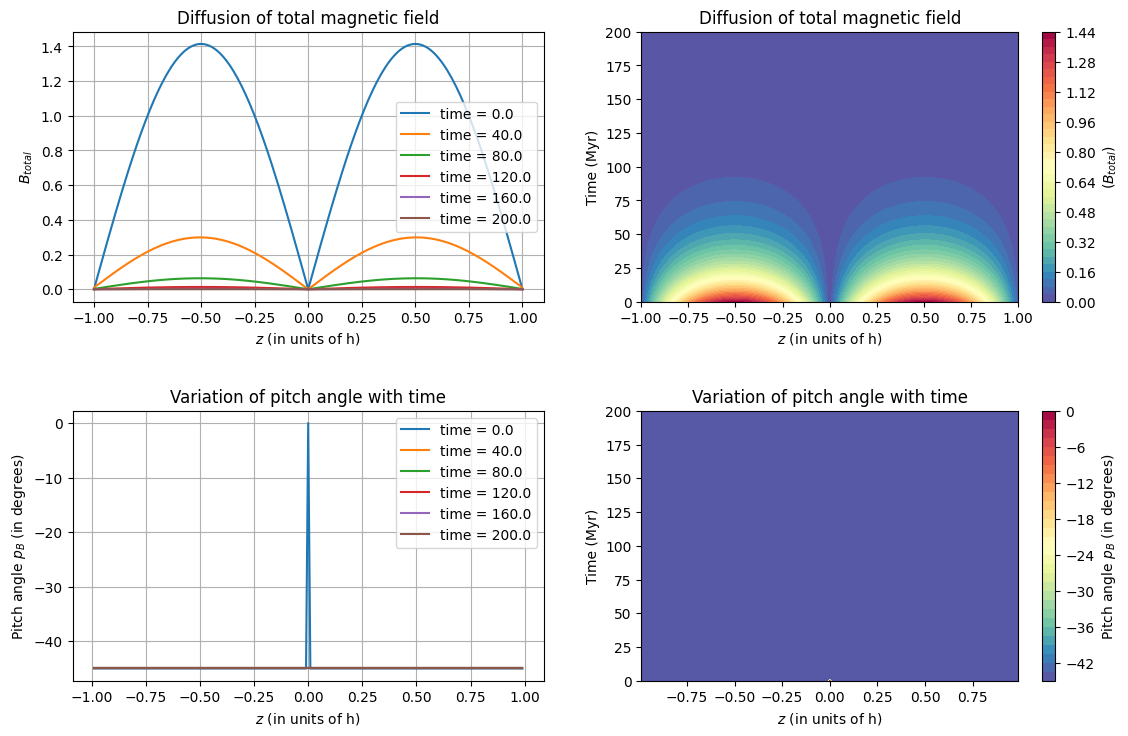

In [21]:
B_total, pitch = ml.get_B_and_pitch(soln_r, soln_phi)

# Plot the total magnetic field and the pitch angle
# Create 2D plots
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
for i in (range(0, len(time_grid), int(len(time_grid)/5))):
    plt.plot(spatial_grid, B_total[:, i], label=f'time = {time_grid[i]:.1f}')
plt.xlabel(r'$z$ (in units of h)')
plt.ylabel(r'$B_{total}$')
plt.title('Diffusion of total magnetic field')
plt.grid()
plt.legend()

# Create imshow plot
plt.subplot(2, 2, 2)
plt.contourf(*np.meshgrid(spatial_grid, time_grid), B_total.T, 40, cmap='Spectral_r')
plt.colorbar(label=r'($B_{total}$)')
plt.title(r'Diffusion of total magnetic field')
plt.xlabel(r'$z$ (in units of h)')
plt.ylabel(r'Time (Myr)')

# Create 2D plots
plt.subplot(2, 2, 3)
for i in (range(0, len(time_grid), int(len(time_grid)/5))):
    plt.plot(spatial_grid[1:-1], pitch[1:-1, i], label=f'time = {time_grid[i]:.1f}')
plt.xlabel(r'$z$ (in units of h)')
plt.ylabel(r'Pitch angle $p_B$ (in degrees)')
plt.title(r'Variation of pitch angle with time')
plt.grid()
plt.legend()

# Create imshow plot
plt.subplot(2, 2, 4)
plt.contourf(*np.meshgrid(spatial_grid[1:-1], time_grid), pitch.T[:, 1:-1], 40, cmap='Spectral_r')
plt.colorbar(label=r'Pitch angle $p_B$ (in degrees)')
plt.title('Variation of pitch angle with time')
plt.xlabel(r'$z$ (in units of h)')
plt.ylabel('Time (Myr)')

plt.tight_layout(pad=3)

plt.show()

C:\Users\Ratul\AppData\Local\Temp\ipykernel_20928\2024637333.py:2: RuntimeWarning: divide by zero encountered in log
  B_mid = np.log(B_total[int(len(spatial_grid)/2), :])


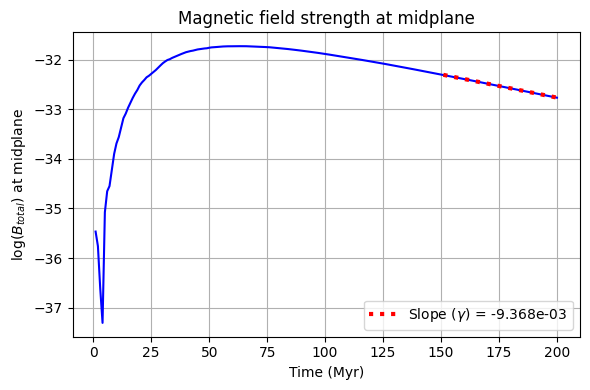

In [22]:
# Plot the decay of the magnetic field at the midplane
B_mid = np.log(B_total[int(len(spatial_grid)/2), :])
m, c = np.polyfit(time_grid[-50:], B_mid[-50:], 1)

plt.figure(figsize=(6, 4))
plt.plot(time_grid, B_mid, 'b-')
# plot another line with the slope and intercept m and c
plt.plot(time_grid[-50:], m*time_grid[-50:] + c, 'r:', linewidth=3, label=r'Slope ($\gamma$) = {:.3e}'.format(m))
plt.xlabel('Time (Myr)')
plt.ylabel('log$(B_{total})$ at midplane')
plt.title(r'Magnetic field strength at midplane')
# plt.yscale('log')
plt.grid()
plt.legend()
plt.tight_layout()

plt.show()

# Initial Conditions - III

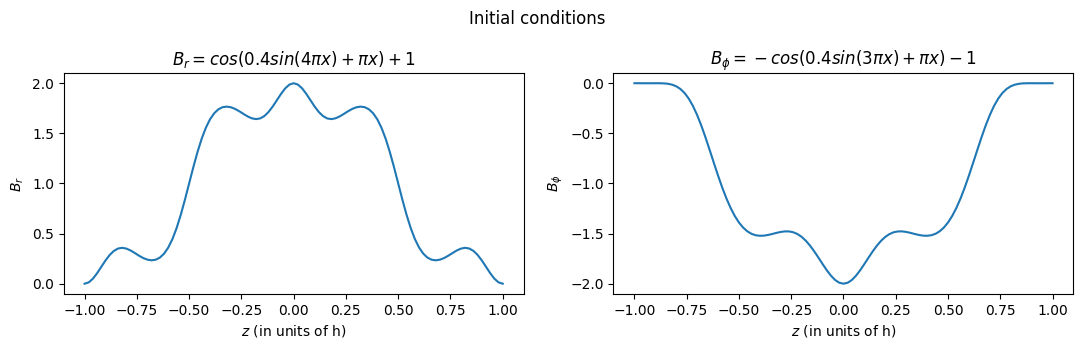

In [23]:
def init_cond_Br(x):
    return np.cos(0.4*np.sin(np.pi*4*(x)) + np.pi*(x))+1

def init_cond_Bphi(x):
    return -np.cos(0.4*np.sin(np.pi*3*(x)) + np.pi*(x))-1

def source_term(x, t):
    return 0

z = np.linspace(-1, 1, 101)

plt.figure(figsize=(11, 3.5))
plt.subplot(121)
plt.plot(z, init_cond_Br(z))
plt.xlabel(r'$z$ (in units of h)')
plt.ylabel(r'$B_r$')
plt.title(r'$B_r = cos(0.4sin(4\pi x) + \pi x) + 1$')

plt.subplot(122)
plt.plot(z, init_cond_Bphi(z))
plt.xlabel(r'$z$ (in units of h)')
plt.ylabel(r'$B_{\phi}$')
plt.title(r'$B_\phi = -cos(0.4sin(3\pi x) + \pi x) - 1$')

plt.suptitle('Initial conditions')
plt.tight_layout(pad=1)

plt.show()

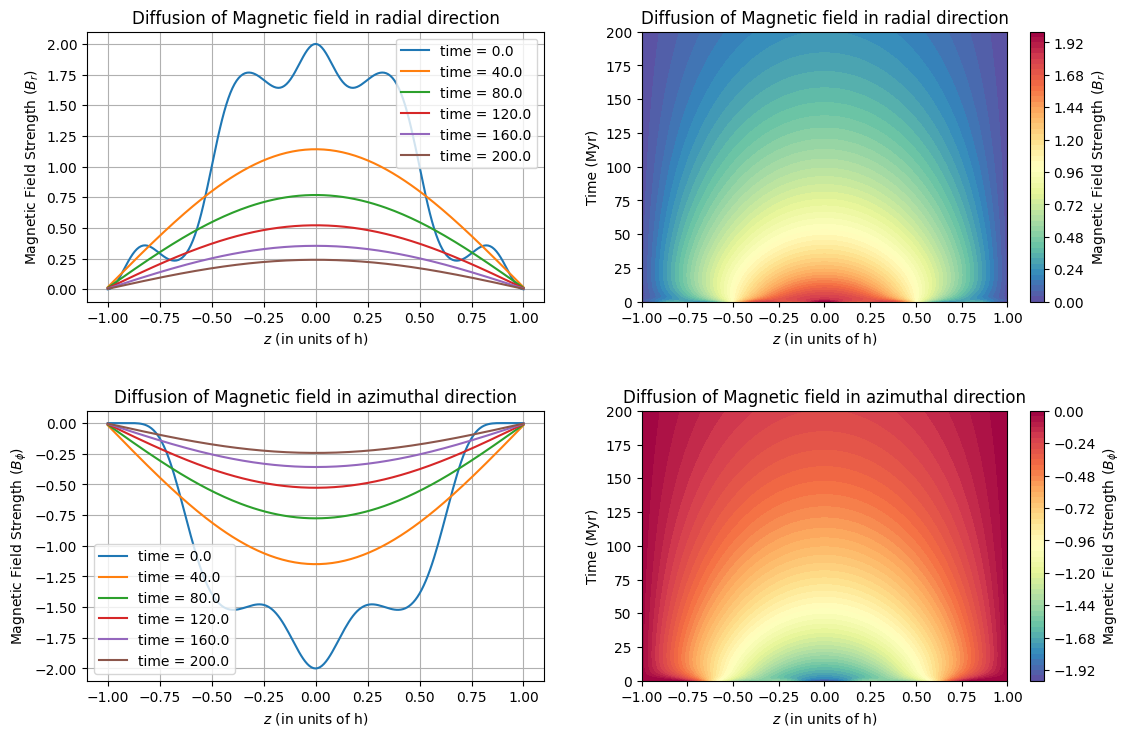

In [24]:
# Constants and parameters
eta_T = 4e-3    # magnetic diffusivity
t_max = 200     # total simulation time
z_min = -1.0     # minimum thickness of the disc
z_max = 1.0     # thickness of the disc
dt = t_max/200       # time step
dz = 0.01       # spatial step in z direction

# Solve for B_r
soln_r, spatial_grid, time_grid = ml.CN_diffusion(z_min, z_max, t_max, dz, dt, eta_T, init_cond_Br, source_term, ml.diff_mat_dirichlet)
# Solve for B_phi
soln_phi, spatial_grid, time_grid = ml.CN_diffusion(z_min, z_max, t_max, dz, dt, eta_T, init_cond_Bphi, source_term, ml.diff_mat_dirichlet)

# Plot the diffusion equation solution
#ml.plot_diff(time_grid, spatial_grid, soln_r, soln_phi)

# Create 2D plots
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
for i in (range(0, len(time_grid), int(len(time_grid)/5))):
    plt.plot(spatial_grid, soln_r[:, i], label=f'time = {time_grid[i]:.1f}')
plt.xlabel(r'$z$ (in units of h)')
plt.ylabel(r'Magnetic Field Strength ($B_r$)')
plt.title('Diffusion of Magnetic field in radial direction')
# plt.ylim(np.min(solution_r), np.max(solution_r))
plt.grid()
plt.legend()

# Create imshow plot
plt.subplot(2, 2, 2)
plt.contourf(*np.meshgrid(spatial_grid, time_grid), soln_r.T, 50, cmap='Spectral_r')
plt.colorbar(label=r'Magnetic Field Strength ($B_r$)')
plt.title(r'Diffusion of Magnetic field in radial direction')
plt.xlabel(r'$z$ (in units of h)')
plt.ylabel(r'Time (Myr)')

# Create 2D plots
plt.subplot(2, 2, 3)
for i in (range(0, len(time_grid), int(len(time_grid)/5))):
    plt.plot(spatial_grid, soln_phi[:, i], label=f'time = {time_grid[i]:.1f}')
plt.xlabel(r'$z$ (in units of h)')
plt.ylabel(r'Magnetic Field Strength ($B_\phi$)')
plt.title(r'Diffusion of Magnetic field in azimuthal direction')
# plt.ylim(np.min(solution_phi), np.max(solution_phi))
plt.grid()
plt.legend()

# Create imshow plot
plt.subplot(2, 2, 4)
plt.contourf(*np.meshgrid(spatial_grid, time_grid), soln_phi.T, 50, cmap='Spectral_r')
plt.colorbar(label=r'Magnetic Field Strength ($B_\phi$)')
plt.title('Diffusion of Magnetic field in azimuthal direction')
plt.xlabel(r'$z$ (in units of h)')
plt.ylabel('Time (Myr)')
plt.tight_layout(pad=3)

plt.show()

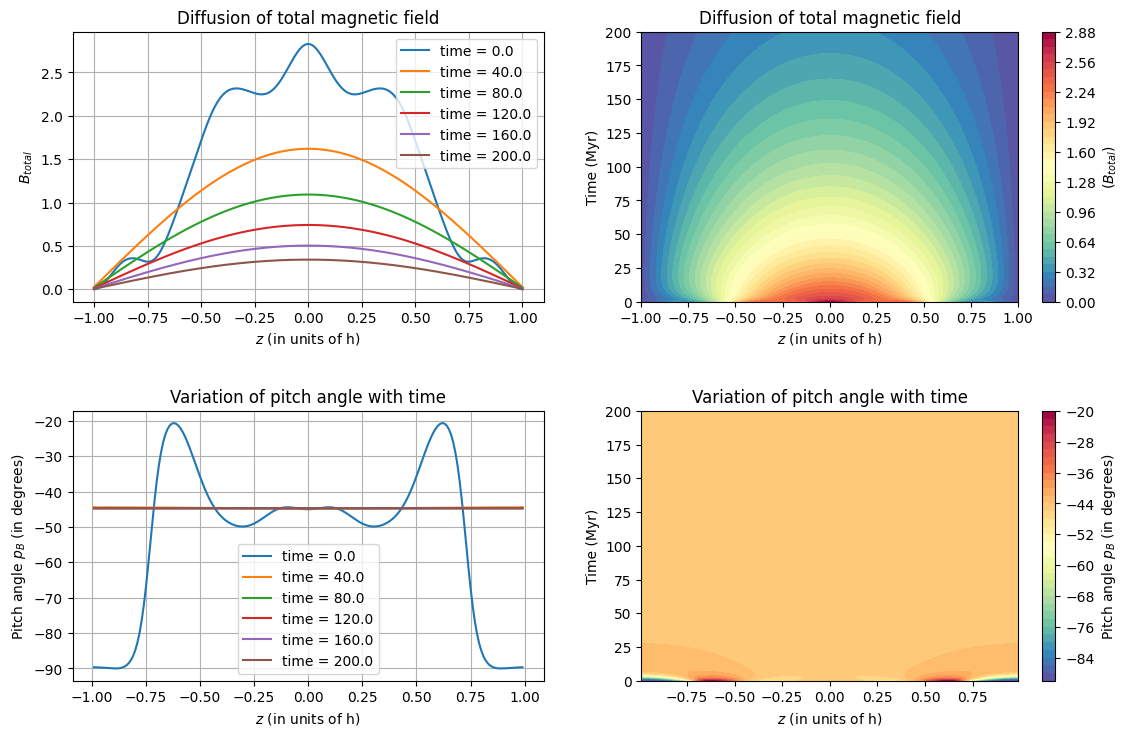

In [25]:
B_total, pitch = ml.get_B_and_pitch(soln_r, soln_phi)

# Plot the total magnetic field and the pitch angle

# Create 2D plots
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
for i in (range(0, len(time_grid), int(len(time_grid)/5))):
    plt.plot(spatial_grid, B_total[:, i], label=f'time = {time_grid[i]:.1f}')
plt.xlabel(r'$z$ (in units of h)')
plt.ylabel(r'$B_{total}$')
plt.title('Diffusion of total magnetic field')
plt.grid()
plt.legend()

# Create imshow plot
plt.subplot(2, 2, 2)
plt.contourf(*np.meshgrid(spatial_grid, time_grid), B_total.T, 40, cmap='Spectral_r')
plt.colorbar(label=r'($B_{total}$)')
plt.title(r'Diffusion of total magnetic field')
plt.xlabel(r'$z$ (in units of h)')
plt.ylabel(r'Time (Myr)')

# Create 2D plots
plt.subplot(2, 2, 3)
for i in (range(0, len(time_grid), int(len(time_grid)/5))):
    plt.plot(spatial_grid[1:-1], pitch[1:-1, i], label=f'time = {time_grid[i]:.1f}')
plt.xlabel(r'$z$ (in units of h)')
plt.ylabel(r'Pitch angle $p_B$ (in degrees)')
plt.title(r'Variation of pitch angle with time')
plt.grid()
plt.legend()

# Create imshow plot
plt.subplot(2, 2, 4)
plt.contourf(*np.meshgrid(spatial_grid[1:-1], time_grid), pitch.T[:, 1:-1], 40, cmap='Spectral_r')
plt.colorbar(label=r'Pitch angle $p_B$ (in degrees)')
plt.title('Variation of pitch angle with time')
plt.xlabel(r'$z$ (in units of h)')
plt.ylabel('Time (Myr)')

plt.tight_layout(pad=3)

plt.show()

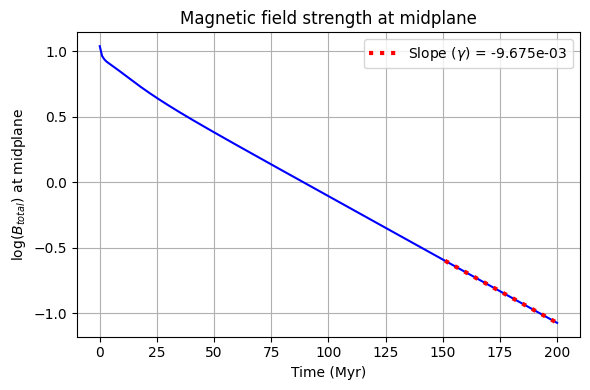

In [26]:
# Plot the decay of the magnetic field at the midplane
B_mid = np.log(B_total[int(len(spatial_grid)/2), :])
m, c = np.polyfit(time_grid[-50:], B_mid[-50:], 1)

plt.figure(figsize=(6, 4))
plt.plot(time_grid, B_mid, 'b-')
# plot another line with the slope and intercept m and c
plt.plot(time_grid[-50:], m*time_grid[-50:] + c, 'r:', linewidth=3, label=r'Slope ($\gamma$) = {:.3e}'.format(m))
plt.xlabel('Time (Myr)')
plt.ylabel('log$(B_{total})$ at midplane')
plt.title(r'Magnetic field strength at midplane')
# plt.yscale('log')
plt.grid()
plt.legend()
plt.tight_layout()

plt.show()